In [1]:
import pandas as pd
from entsoe import EntsoePandasClient
import seaborn as sns
import numpy as np
from datetime import datetime, date, timedelta

In [2]:
# Connecting to ENTSO-E API 

client = EntsoePandasClient(api_key='4b1229d3-1c2c-4fbb-9e43-4d1692208b57')

In [3]:
# timestamps
today = datetime.today()
today_previoushour = today.replace(hour = today.hour -1  ,minute=59,second = 59, microsecond=00)
PreviousDay = today_previoushour.replace(day = today.day -1)
start = pd.Timestamp(PreviousDay, tz='Europe/Brussels')
end = pd.Timestamp(today_previoushour, tz='Europe/Brussels')

In [4]:
# QUERY 1: Actual Generation

# Queries of each country

# Countries = ['PT','ES', 'FR','DE','BE','CZ','IT','AT', 'NL']
# Generation = []

# for i in Countries: 
    # Query = client.query_generation(i, start=start,end=end, psr_type=None) # Generation Query 
    # Query['Country'] = i
    # Generation.append(Query)

# Generation = pd.concat(Generation)

# Generation.rename(columns=''.join, inplace=True)
# Generation['Date'] = Generation.index.astype(str)
# Generation['Date'] = pd.to_datetime(Generation['Date'])

#Unpitoving for Tableau format

# Generation_lastmonth_unpivoted = Generation.melt(id_vars = ['Date','Country'])
    

In [17]:
# QUERY 2: Day Ahead Prices

Countries = ['ES','PT','FR','DE_LU','BE','CZ','IT_NORD','AT','NL','SK','FI','CH','PL','GR','EE','HU','RO','LT','LV','NO_1','RS','SI']

Day_Ahead_Prices = []

for i in Countries: 
    Query = client.query_day_ahead_prices(i, start=start,end=end).to_frame() # Prices Query 
    Query['Country'] = i
    Day_Ahead_Prices.append(Query)

Day_Ahead_Prices = pd.concat(Day_Ahead_Prices)

#Adding Luxembourg

Price_Luxembourg = client.query_day_ahead_prices('DE_LU', start=start,end=end).to_frame()
Price_Luxembourg['Country']="LU"
Day_Ahead_Prices = pd.concat([Day_Ahead_Prices,Price_Luxembourg])

#Replacing wrong country codes 

Day_Ahead_Prices['Country'].replace(to_replace= 'DE_LU',value='DE', inplace= True)
Day_Ahead_Prices['Country'].replace(to_replace= 'IT_NORD',value='IT', inplace= True)
Day_Ahead_Prices['Country'].replace(to_replace= 'NO_1',value='NO', inplace= True)
Day_Ahead_Prices['Country'].replace(to_replace= 'GB',value='UK', inplace= True)

# Adding Date Column

Day_Ahead_Prices['Date'] = Day_Ahead_Prices.index.astype(str).str[:-6]
Day_Ahead_Prices['Date'] = pd.to_datetime(Day_Ahead_Prices['Date'])

# Creating/Renaming value column 

Day_Ahead_Prices['Value (€/MWh)'] = Day_Ahead_Prices[0]

# Unpitoving for Tableau format
# Prices_unpivoted = Prices.melt(id_vars = ['Country','Date'])

Day_Ahead_Prices


,0,Country,Date,Value (€/MWh)
2023-06-01 10:00:00+02:00,73.86,ES,2023-06-01 10:00:00,73.86
2023-06-01 11:00:00+02:00,72.81,ES,2023-06-01 11:00:00,72.81
2023-06-01 12:00:00+02:00,72.81,ES,2023-06-01 12:00:00,72.81
2023-06-01 13:00:00+02:00,72.00,ES,2023-06-01 13:00:00,72.00
2023-06-01 14:00:00+02:00,70.49,ES,2023-06-01 14:00:00,70.49
...,...,...,...,...
2023-06-02 05:00:00+02:00,90.88,LU,2023-06-02 05:00:00,90.88
2023-06-02 06:00:00+02:00,118.97,LU,2023-06-02 06:00:00,118.97
2023-06-02 07:00:00+02:00,125.58,LU,2023-06-02 07:00:00,125.58
2023-06-02 08:00:00+02:00,96.19,LU,2023-06-02 08:00:00,96.19


<Axes: xlabel='Date', ylabel='Value (€/MWh)'>

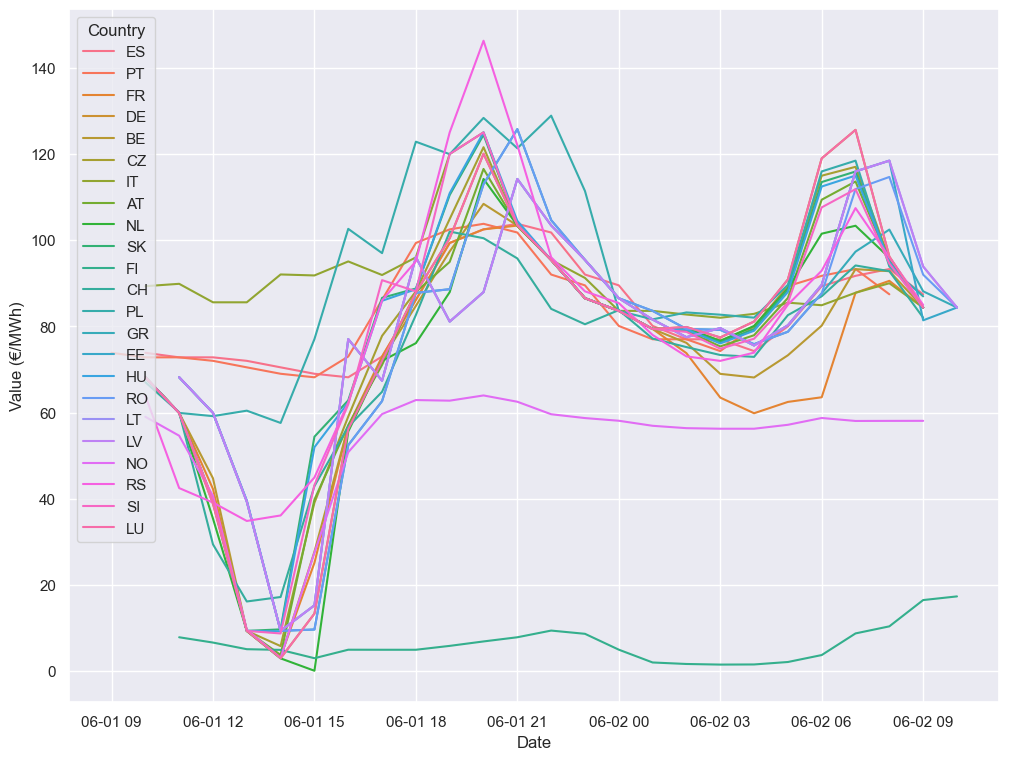

In [13]:
# Visualizing in Seaborn

sns.set(rc={'figure.figsize':(12,9)})
sns.lineplot(data = Day_Ahead_Prices,x = 'Date', y = 'Value (€/MWh)', hue = 'Country')

<Axes: xlabel='Date', ylabel='Value (€/MWh)'>

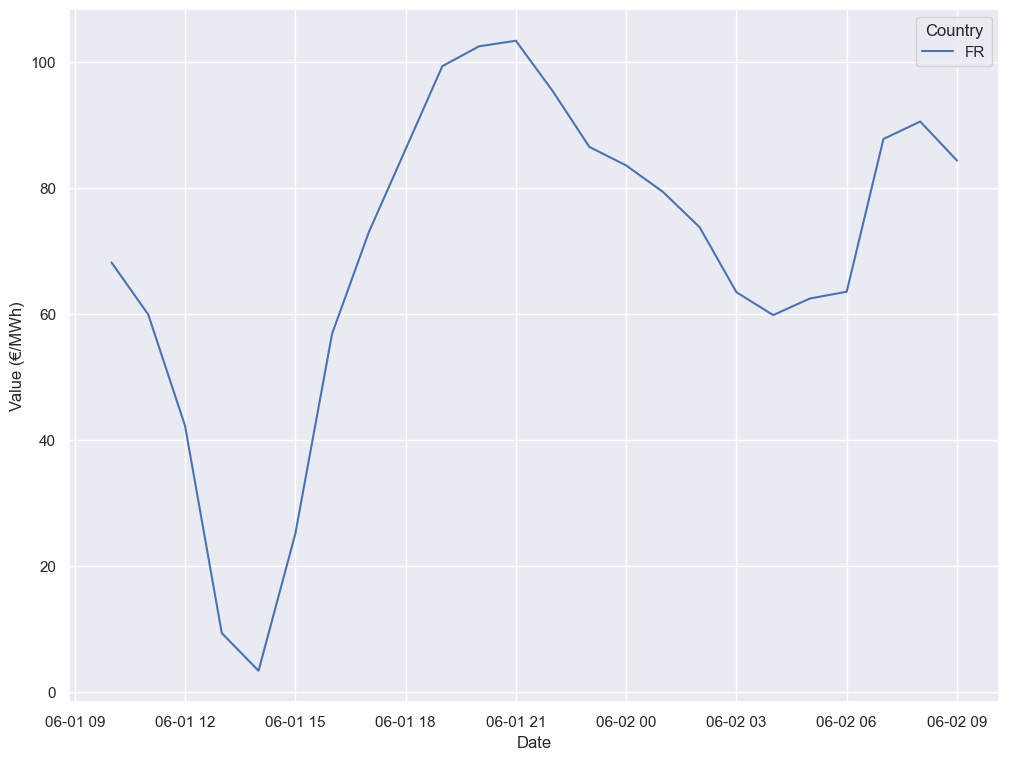

In [37]:
# Visualizing in Seaborn for selected countries
Day_Ahead_Prices_FR = Day_Ahead_Prices[Day_Ahead_Prices['Country'].str.contains('FR')]
sns.set(rc={'figure.figsize':(12,9)})
sns.lineplot(data = Day_Ahead_Prices_FR ,x = 'Date', y = 'Value (€/MWh)', hue = 'Country')